# 컨텐츠 기반 추천시스템

리뷰 군집화 아이템 기반 추천

In [190]:
import matplotlib
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=fontpath, size=8) 

In [191]:
#폰트종류설정
plt.rcParams["font.family"] = 'NanumGothic'

#폰트크기설정
#plt.rcParams["font.size"] = 20

## 데이터 전처리

In [192]:
import konlpy
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

C:\Users\82107\AppData\Local\Temp\ipykernel_20040\691330863.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [193]:
import pandas as pd
import numpy as np
data_df = pd.read_csv('../../data/ulsan_attraction_table.csv')
data_df.head()

place_id  u_id    user_id  score  \
0  가지산 입석대     0  김호영(황소바위)      5   
1  가지산 입석대     1        기회란      4   
2  가지산 입석대     2   손영진(산동무)      5   
3      가지산     0  김호영(황소바위)      5   
4      가지산     3       여름햇살      5   

                                             comment  p_id  
0                                                NaN   248  
1                                                NaN   248  
2                                                NaN   248  
3                                                NaN    16  
4  계단과 가파른 길이 많아 힘은 들지만 정상에서 바라보는 영남알프스의 풍경 값으로는 ...    16

In [194]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15405 entries, 0 to 15404
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   place_id  15405 non-null  object
 1   u_id      15405 non-null  int64 
 2   user_id   15405 non-null  object
 3   score     15405 non-null  int64 
 4   comment   10548 non-null  object
 5   p_id      15405 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 722.2+ KB


In [195]:
print(data_df.isnull().sum())

data_df = data_df.dropna(how='any')

place_id       0
u_id           0
user_id        0
score          0
comment     4857
p_id           0
dtype: int64


In [196]:
data_df['comment'] = data_df['comment'].str.replace("[^ㄱ-하-ㅣ가-힣 ]", "")

C:\Users\82107\AppData\Local\Temp\ipykernel_20040\2728893579.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df['comment'] = data_df['comment'].str.replace("[^ㄱ-하-ㅣ가-힣 ]", "")


In [197]:
data_df['comment'].replace('', np.nan, inplace=True)
print(len(data_df))
print(data_df.isnull().sum())

10548
place_id     0
u_id         0
user_id      0
score        0
comment     36
p_id         0
dtype: int64


In [198]:
data_df.head()

place_id  u_id      user_id  score  \
4      가지산     3         여름햇살      5   
5      가지산     4   Jayen Yang      5   
6      가지산     5          최정혜      4   
7      가지산     6          이창환      4   
8      가지산     7  TaeHwa Kwon      3   

                                             comment  p_id  
4  계단과 가파른 길이 많아 힘은 들지만 정상에서 바라보는 영남알프스의 풍경 값으로는 ...    16  
5  등린이 번째 산행 다녀왔습니다영알 영남 알프스  밀양 가지산대 명산을 다녀왔습니다 ...    16  
6  상양마을에서 올라가는 코스를 잡았구요마을에 주차장십여대주차가능 및 경로당화장실 이용...    16  
7  가지산은 울산광역시 울주군과 경상남도 밀양시 경상북도 청도군의 경계에 있는 산이다년...    16  
8                      영남날프스 산중에 겨울 눈을 제일 자주 볼수 있는 산    16

## 토큰화 및 불용어 제거

In [199]:
file = open('../../data/stop_word.txt', 'r')

stopWord = []
l = ''
while True:
    l = file.readline()
    stopWord.append(l[:-1])
    if l == '':
        break

In [200]:
len(stopWord)

676

In [201]:
from konlpy.tag import Mecab

mecab =Mecab(dicpath='c://mecab/mecab-ko-dic/')

reviews = []
for sentence in data_df['comment']:
    reviews.append([word for word in mecab.nouns(str(sentence)) if not word in stopWord])

print(len(reviews))
data_df['reviews'] = reviews

10548


In [202]:
data_df.head()

place_id  u_id      user_id  score  \
4      가지산     3         여름햇살      5   
5      가지산     4   Jayen Yang      5   
6      가지산     5          최정혜      4   
7      가지산     6          이창환      4   
8      가지산     7  TaeHwa Kwon      3   

                                             comment  p_id  \
4  계단과 가파른 길이 많아 힘은 들지만 정상에서 바라보는 영남알프스의 풍경 값으로는 ...    16   
5  등린이 번째 산행 다녀왔습니다영알 영남 알프스  밀양 가지산대 명산을 다녀왔습니다 ...    16   
6  상양마을에서 올라가는 코스를 잡았구요마을에 주차장십여대주차가능 및 경로당화장실 이용...    16   
7  가지산은 울산광역시 울주군과 경상남도 밀양시 경상북도 청도군의 경계에 있는 산이다년...    16   
8                      영남날프스 산중에 겨울 눈을 제일 자주 볼수 있는 산    16   

                                             reviews  
4  [계단, 길, 힘, 정상, 영남, 알프스, 풍경, 값, 만, 가치, 석남, 터널, ...  
5  [린, 번, 산행, 영알, 영남, 알프스, 밀양, 가지, 산대, 명산, 코스, 석남...  
6  [상양, 마을, 코스, 마을, 주차장, 십, 대, 주차, 가능, 경로당, 화장실, ...  
7  [가지산, 울산광역시, 울주군, 경상남도, 밀양시, 경상북도, 청도군, 경계, 산,...  
8                              [영남, 산중, 겨울, 눈, 수, 산]

## Word2Vec 생성

In [203]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

In [204]:
word2vec = Word2Vec(reviews, min_count=3, vector_size=100, window=5, sg=0)
word2vec

In [205]:
word2vec.wv.most_similar('친절')

[('직원', 0.999049186706543),
 ('앞', 0.9990183115005493),
 ('불편', 0.9990158081054688),
 ('동물', 0.9990153312683105),
 ('설명', 0.9989774227142334),
 ('분', 0.9989227652549744),
 ('가격', 0.9988589882850647),
 ('입구', 0.9988307952880859),
 ('데', 0.9988219738006592),
 ('관리', 0.9988024234771729)]

## t-sne을 활용한 시각화

In [206]:
tsne = TSNE(n_components=3) # n_components는 차원을 뜻함 

In [207]:
vocab = word2vec.wv.key_to_index
similarity = word2vec.wv[vocab]

In [208]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity) # 전체 similarity를 tsne n_components만큼 변형 ex n=2 -> 2차원
df = pd.DataFrame(transform_similarity, index=vocab, columns=['x', 'y', 'z'])
df[0:10]

x         y         z
곳   16.697048  6.433650  3.216330
수   13.086724  6.113516  7.930925
울산  13.438427  3.808012  5.066592
산책  15.568618  3.298460  1.340786
길   13.893742  3.800068  4.444076
물   17.323315  6.083920  5.282328
공원  13.954784  3.536092  3.996902
장소  15.505213  7.675930  2.956007
정원  13.347637  2.145409  3.229691
시설  13.803191  6.764731  7.544579

In [209]:
df.index

Index(['곳', '수', '울산', '산책', '길', '물', '공원', '장소', '정원', '시설',
       ...
       '원경', '베리', '안내원', '산정', '화', '인파', '종', '폰', '시름', '유튜브'],
      dtype='object', length=2627)

c:\Users\82107\anaconda3\lib\site-packages\matplotlib\collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


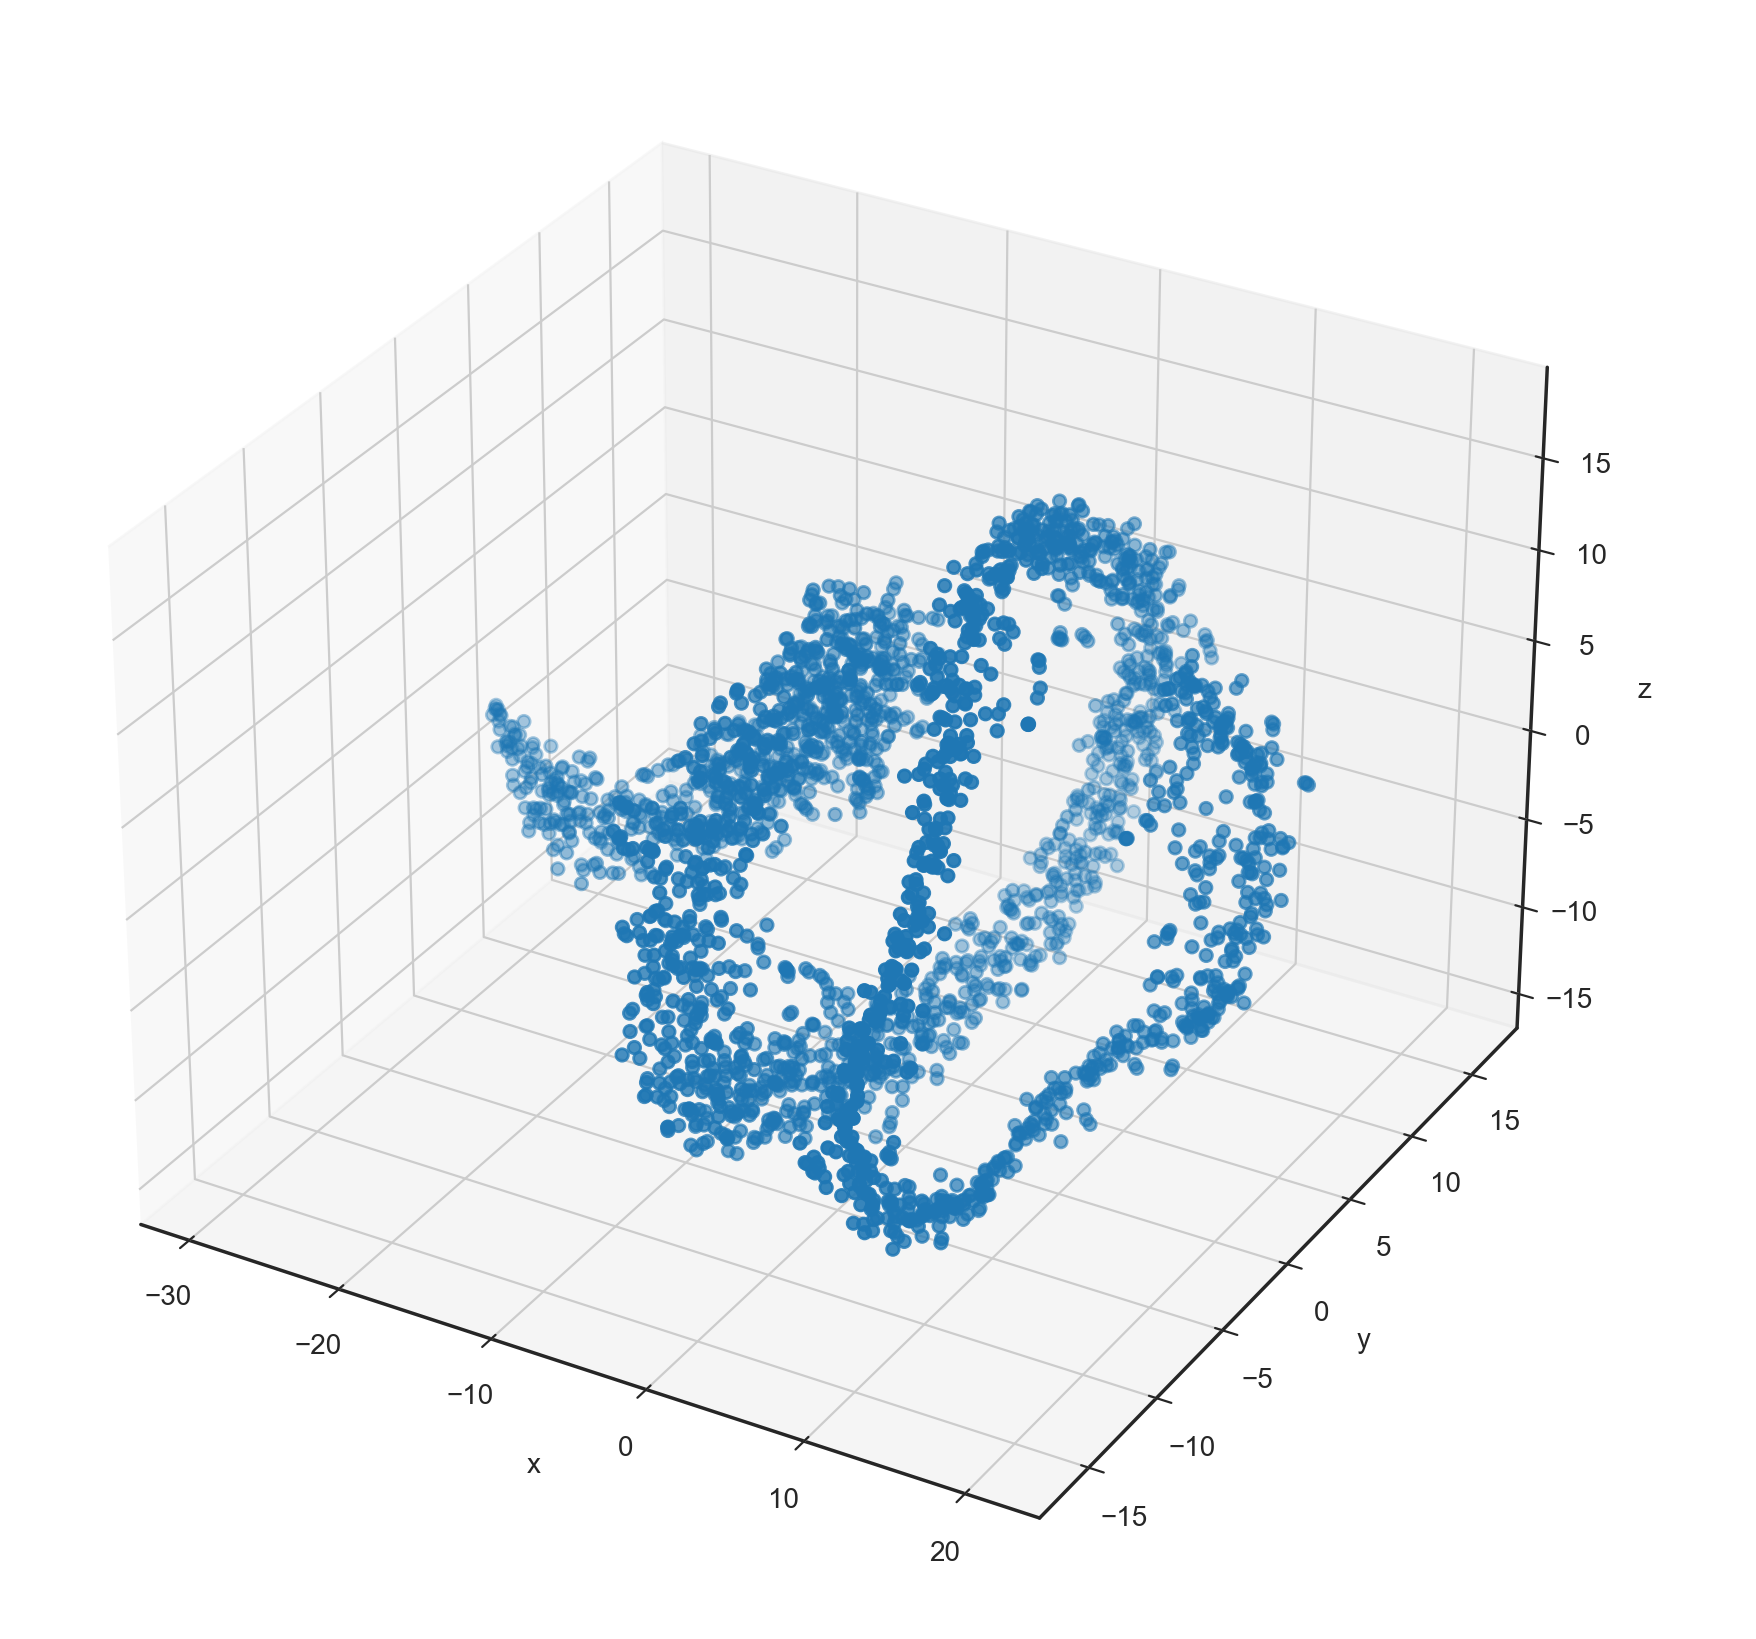

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
# plt.style.use('seaborn-white')
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
fig.add_axes(ax)
# ax = fig.add_subplot(111, projection = '3d')
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

sc = ax.scatter(df['x'], df['y'], df['z'])
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

## 군집화

### 계층적 군집화

#### ward

In [211]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=10, linkage='ward')
predict = ward.fit_predict(df)
# data_df['clusters'] = predict
df['predict'] = predict

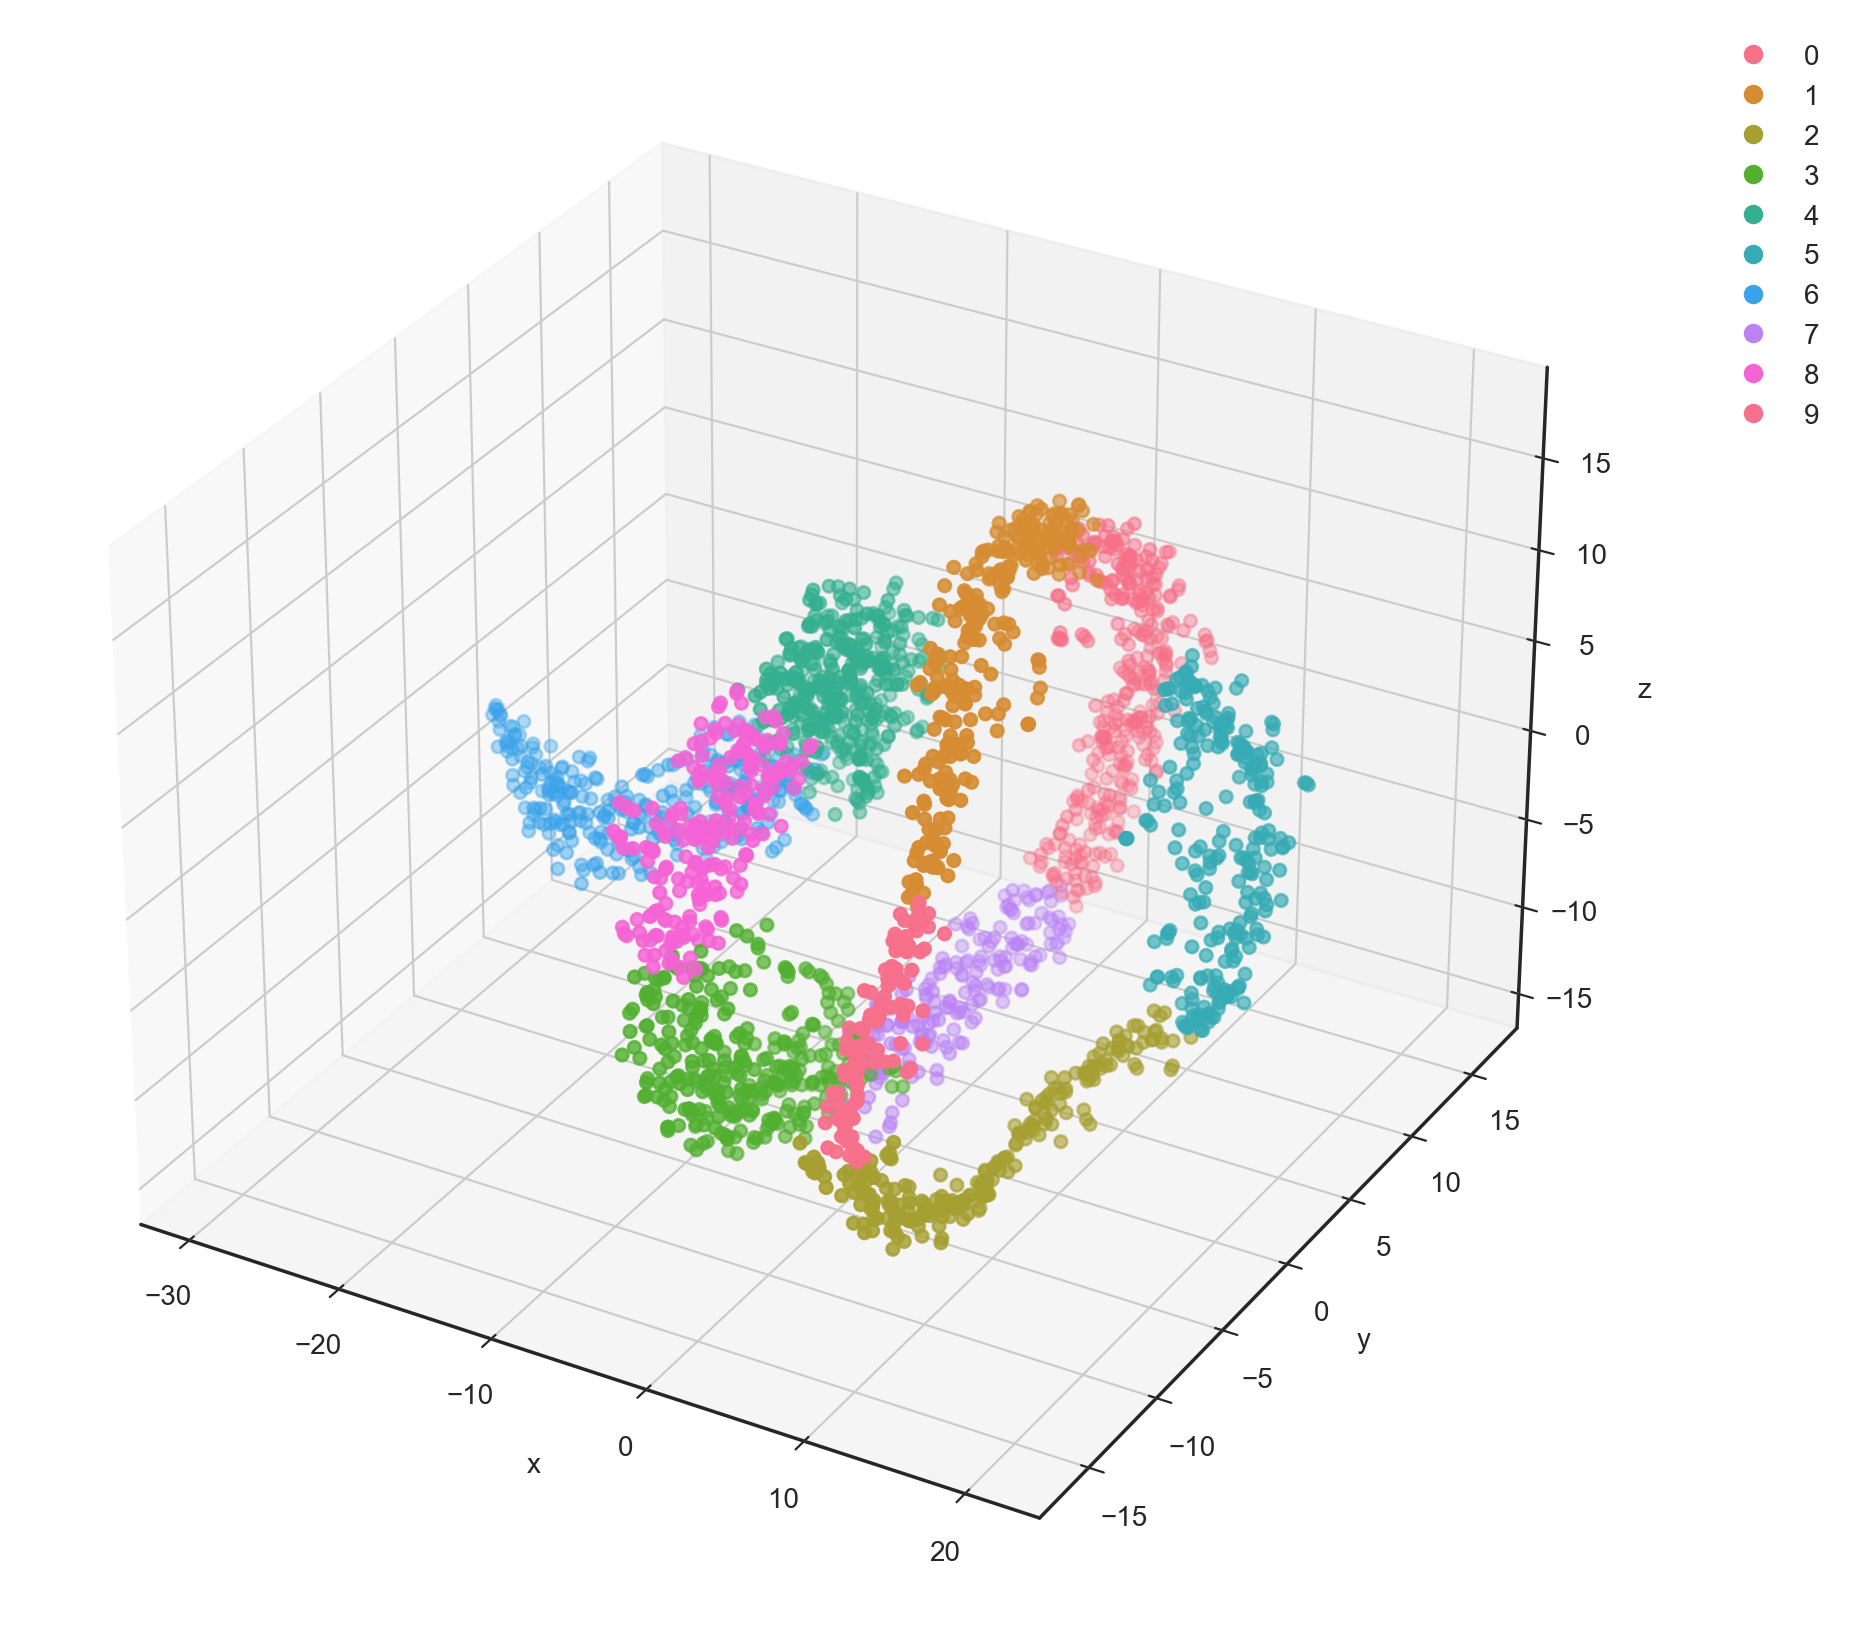

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
# plt.style.use('seaborn-white')
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
fig.add_axes(ax)
# ax = fig.add_subplot(111, projection = '3d')
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

sc = ax.scatter(df['x'], df['y'], df['z'], c=df['predict'], cmap=cmap)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

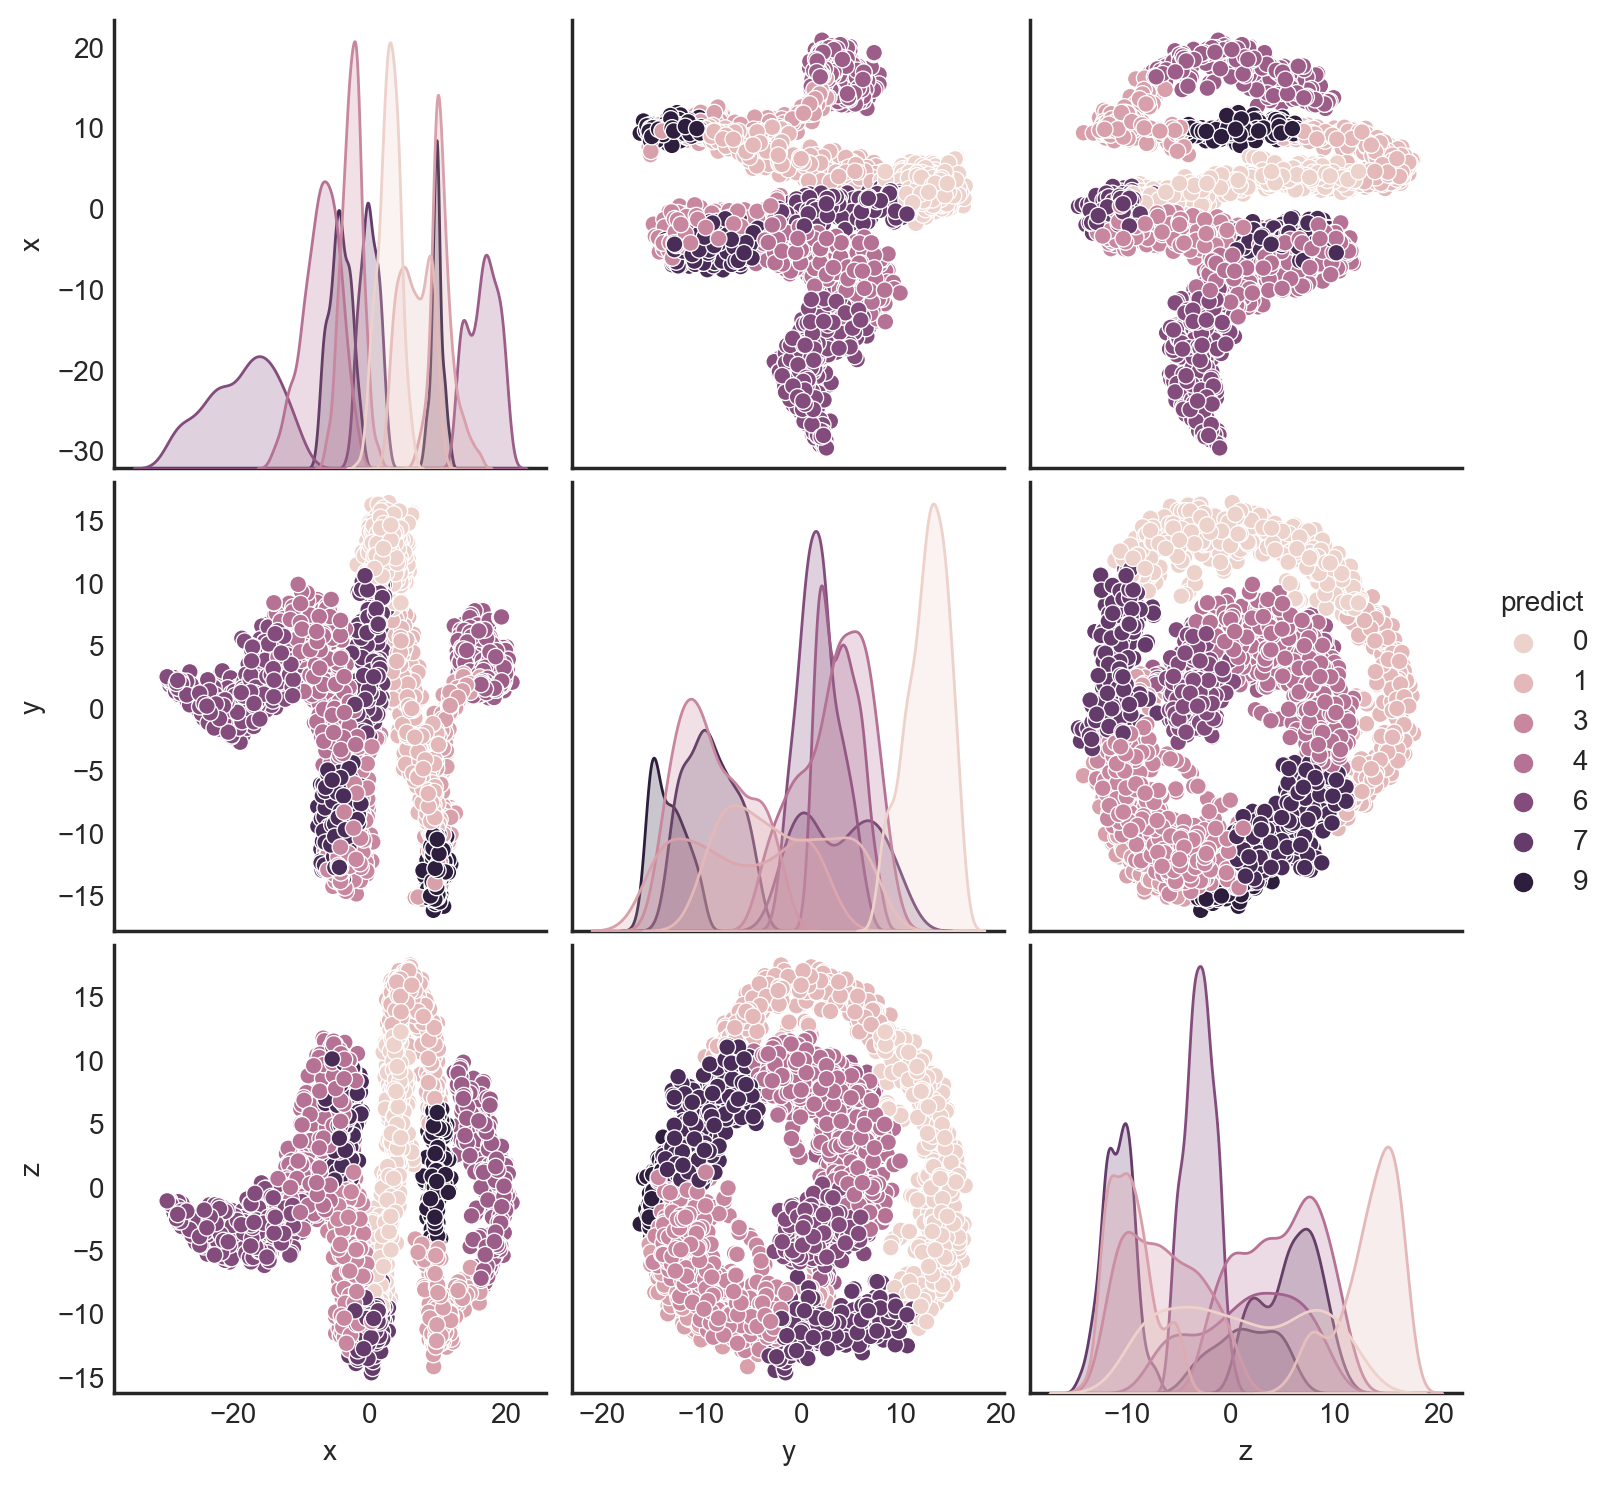

In [213]:
sns.pairplot(df, hue='predict')

<Axes: xlabel='predict', ylabel='count'>

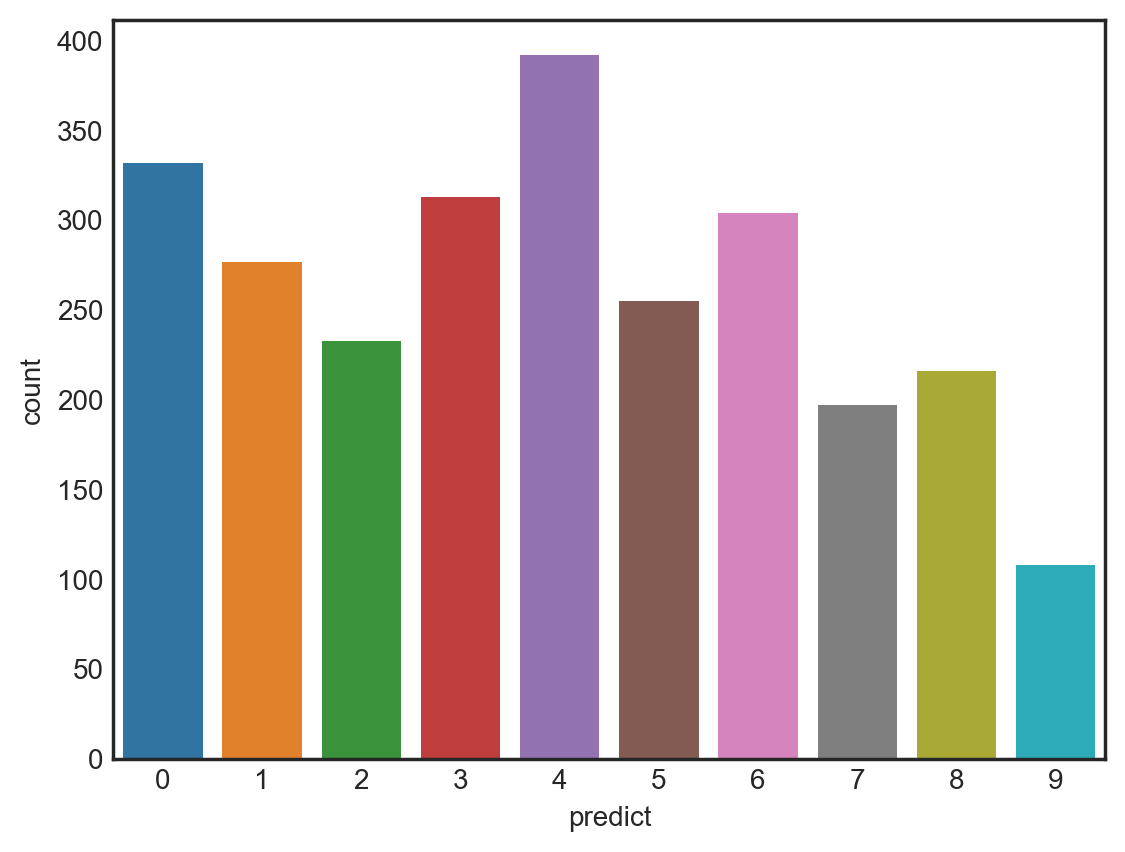

In [214]:
sns.countplot(x=df['predict'])

In [215]:
cluster0 = list(df[df['predict']==0].index)
cluster1 = list(df[df['predict']==1].index)
cluster2 = list(df[df['predict']==2].index)
cluster3 = list(df[df['predict']==3].index)
cluster4 = list(df[df['predict']==4].index)
cluster5 = list(df[df['predict']==5].index)
cluster6 = list(df[df['predict']==6].index)
cluster7 = list(df[df['predict']==7].index)
cluster8 = list(df[df['predict']==8].index)
cluster9 = list(df[df['predict']==9].index)

In [216]:
cluster0[:10]

['휴식처', '둘레길', '전기', '사색', '백일홍', '꽃구경', '분수', '친화', '볼', '동반']

In [217]:
cluster1[:10]

['순천', '노후', '조아', '경험', '최적', '접근', '벗', '절경', '유료', '온천물']

In [218]:
cluster2[:10]

['경관', '한눈', '데이트', '공사', '국화', '겸', '나들이', '여유', '주위', '편안']

In [219]:
cluster3[:10]

['변화', '바베큐', '장미꽃', '해바라기', '음악', '작년', '문수산', '픽', '수량', '식물원']

In [220]:
cluster4[:10]

['자전거길', '도시락', '랜드마크', '브런치', '베스트', '배드민턴', 'ㅅ', '정화', '별거', '가요']

In [221]:
cluster5[:10]

['곳', '수', '울산', '산책', '길', '물', '공원', '장소', '정원', '시설']

In [222]:
cluster9[:10]

['가보세요', '배내봉', '올해', '행복', '여름철', '커피숍', '성인', '교육', '야영장', '물놀']

In [223]:
item_Table = pd.DataFrame(columns=['p_id', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [224]:
data_df['p_id'].iloc[0]

16

In [225]:
for idx, row in enumerate(data_df['reviews']):
    c0, c1, c2, c3, c4, c5, c6, c7, c8, c9 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    for word in list(row):
        if word in cluster0:
            c0 += 1
        elif word in cluster1:
            c1 += 1
        elif word in cluster2:
            c2 += 1
        elif word in cluster3:
            c3 += 1
        elif word in cluster4:
            c4 += 1
        elif word in cluster5:
            c5 += 1
        elif word in cluster6:
            c6 += 1
        elif word in cluster7:
            c7 += 1
        elif word in cluster8:
            c8 += 1
        else:
            c9 += 1

    new_data = pd.DataFrame({'p_id': [data_df['p_id'].iloc[idx]], '0': [c0], '1': [c1], '2': [c2], '3': [c3], '4': [c4], '5': [c5], '6': [c6], '7': [c7], '8': [c8], '9': [c9]})
    item_Table = pd.concat([item_Table, new_data], axis=0, names=['p_id', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [226]:
item_Table.to_csv('../../data/attraction_ward_item_Table.csv', encoding='utf-8-sig')

In [227]:
item_Matrix = item_Table.groupby('p_id').mean()

In [228]:
from sklearn.metrics.pairwise import cosine_similarity

In [229]:
item_Matrix = item_Matrix.to_numpy()

similarity = cosine_similarity(item_Matrix, item_Matrix)
print('코사인 유사도 연산 결과 :',similarity.shape)

코사인 유사도 연산 결과 : (235, 235)


In [230]:
def get_recommendations(p_id, sim=similarity):
    # 해당 영화와 모든 영화와의 유사도를 가져온다.
    sim_scores = list(enumerate(sim[p_id]))

    # 유사도에 따라 영화들을 정렬한다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아온다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 얻는다.
    movie_indices = [idx[0] for idx in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴한다.
    return sim_scores

In [231]:
get_recommendations(100)

[(88, 0.996604491141589),
 (42, 0.9954293964413582),
 (79, 0.9939820202660604),
 (136, 0.9935624770492918),
 (64, 0.9926313898824913),
 (15, 0.9918022933597225),
 (39, 0.9915523092482856),
 (174, 0.9915144355551663),
 (177, 0.9914983958180773),
 (52, 0.9914811177899663)]

### 비계층적 군집화

#### K-Means

In [232]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)
predict = kmeans.fit_predict(df)
results = df
results['predict'] = predict

c:\Users\82107\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\82107\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


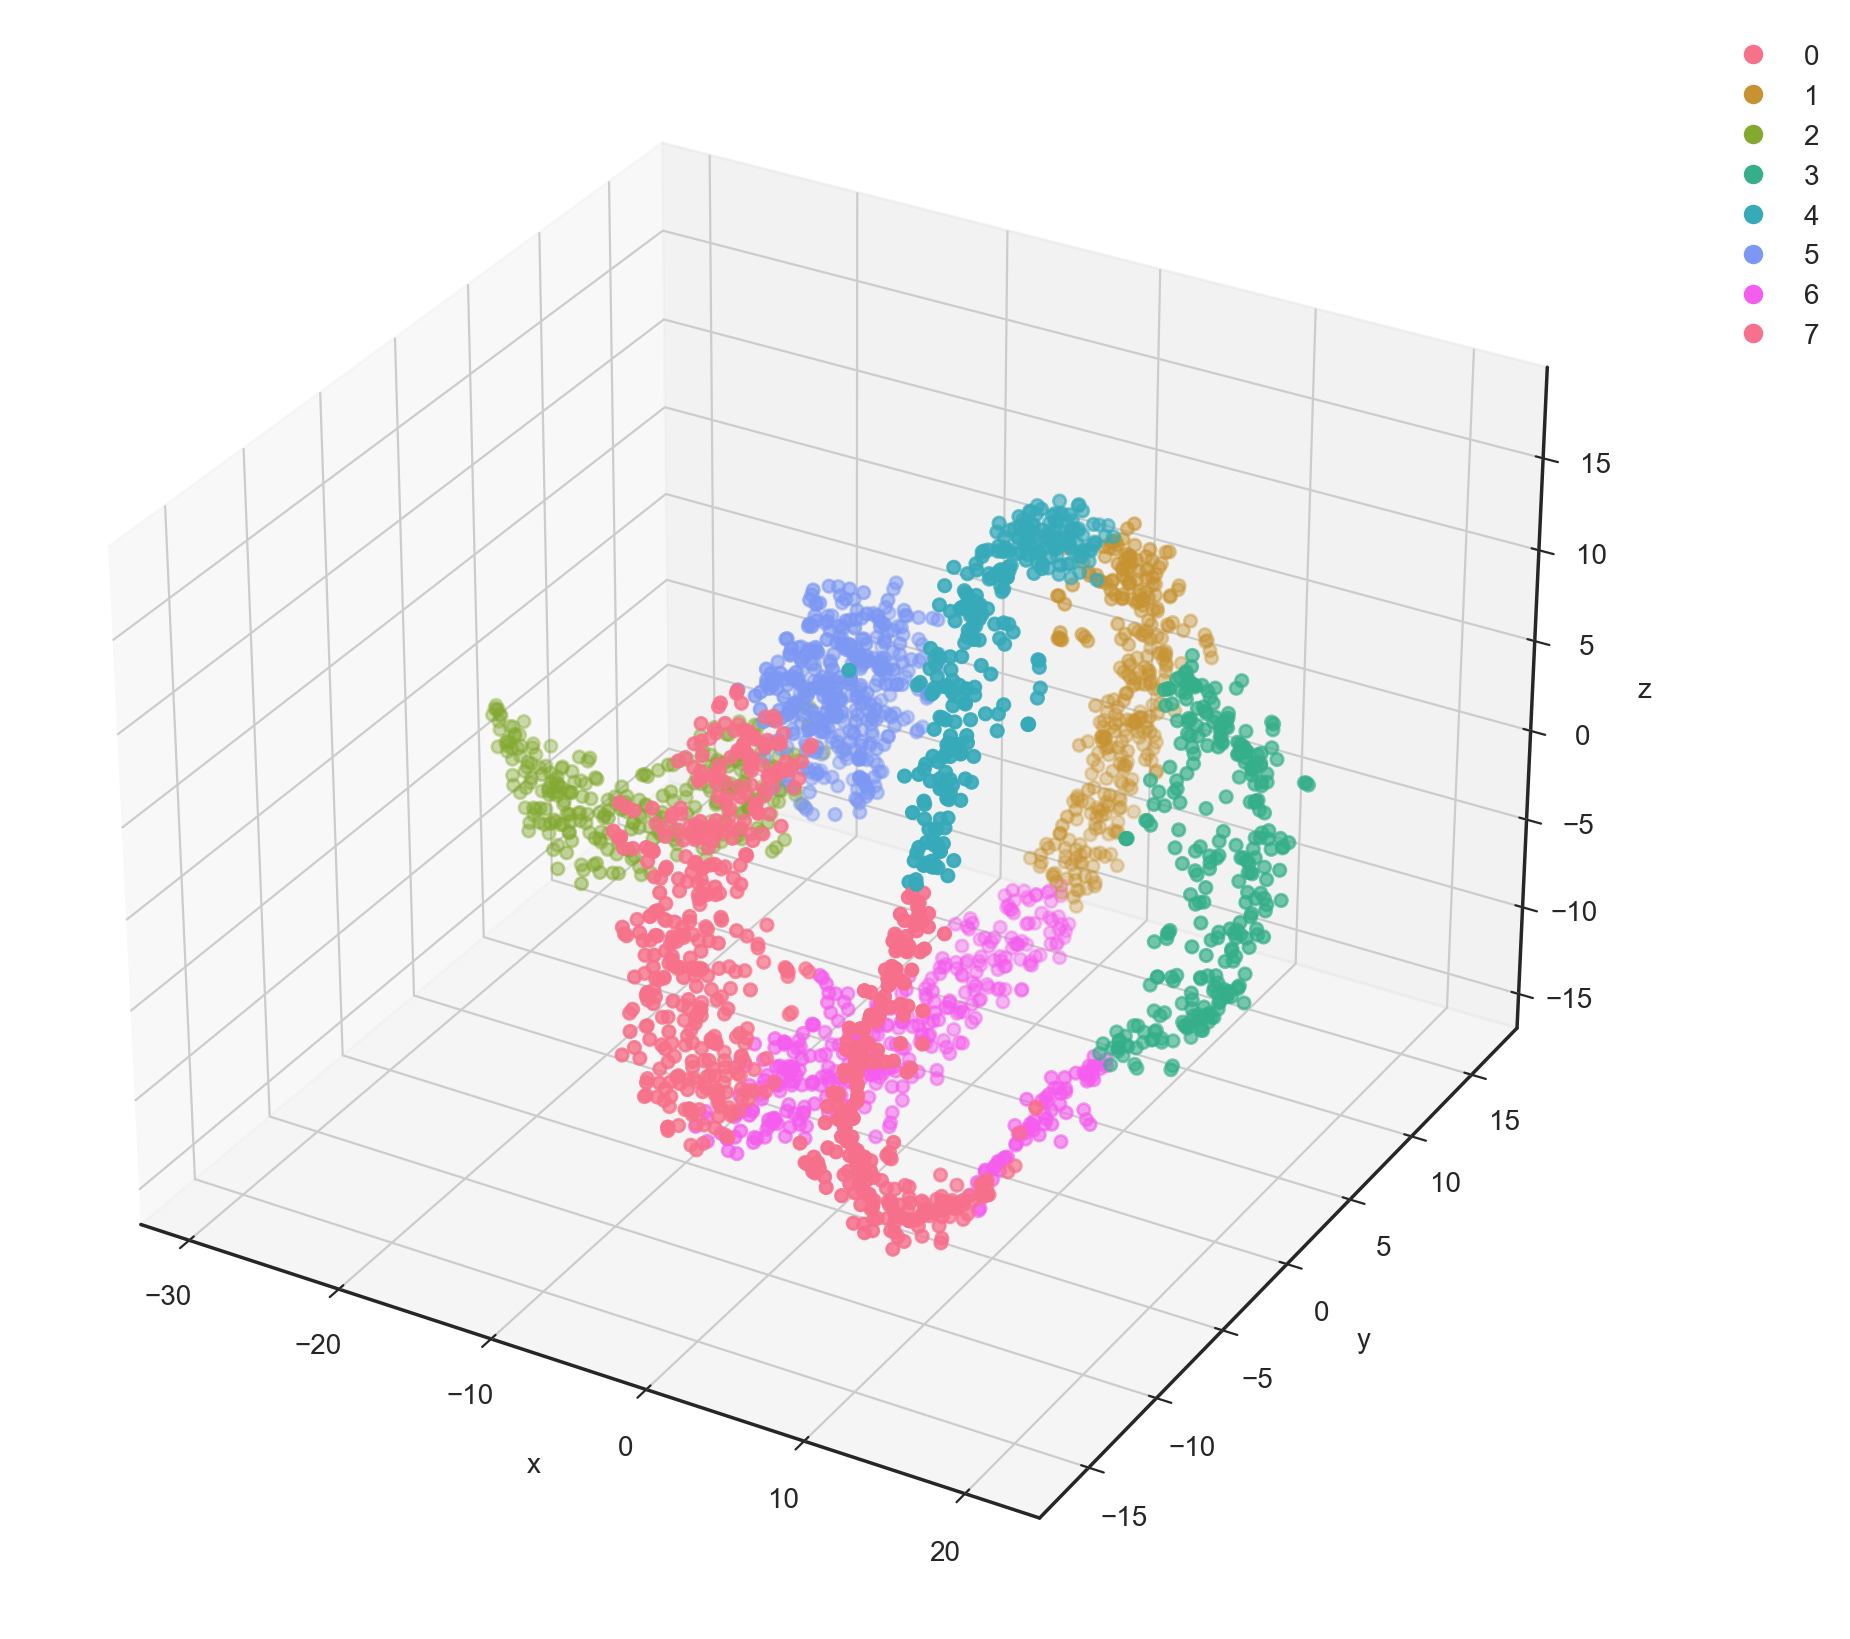

In [233]:
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
fig.add_axes(ax)
# ax = fig.add_subplot(111, projection = '3d')
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

sc = ax.scatter(df['x'], df['y'], df['z'], c=df['predict'], cmap=cmap)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

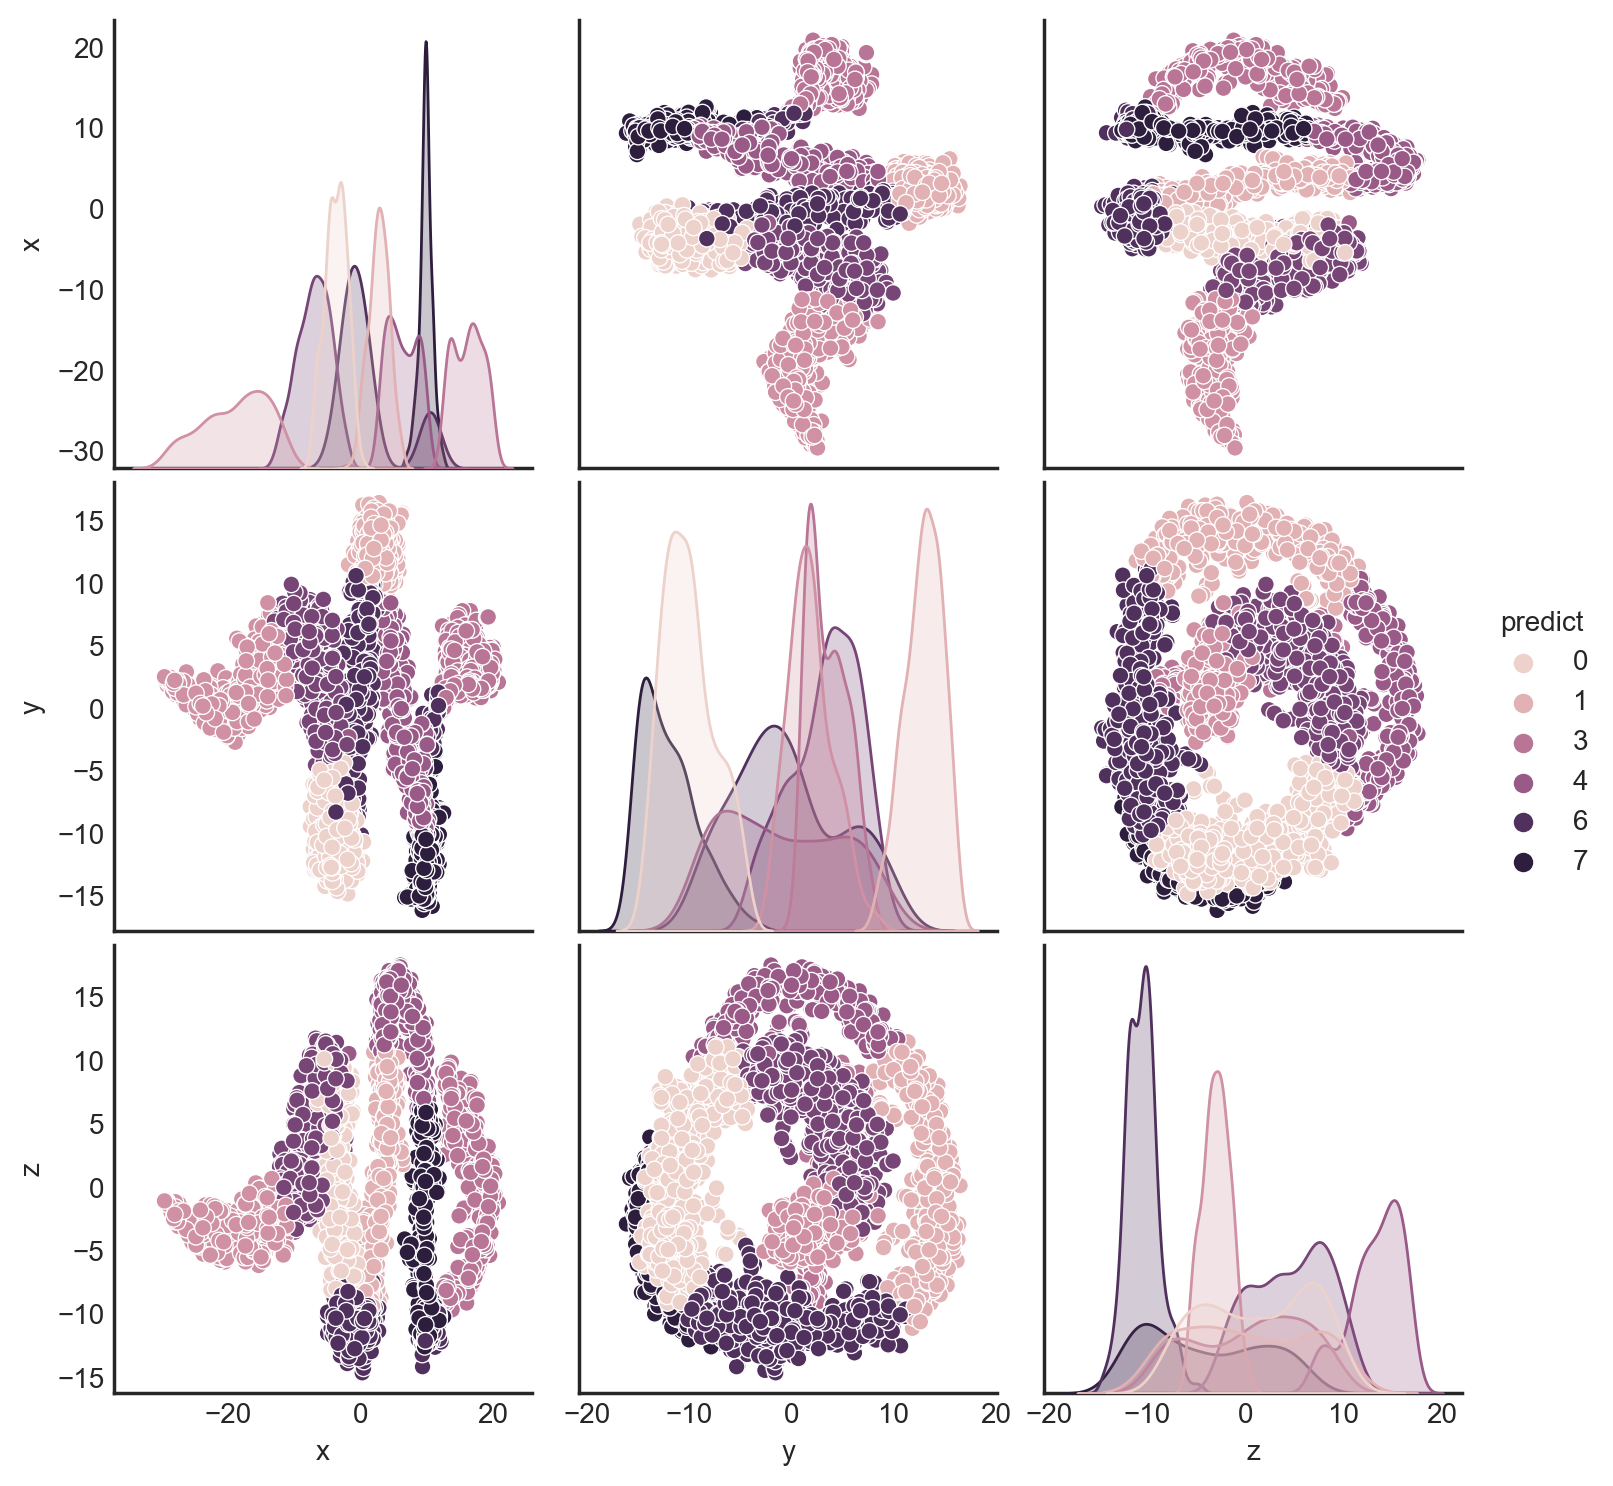

In [234]:
sns.pairplot(df, hue='predict')

<Axes: xlabel='predict', ylabel='count'>

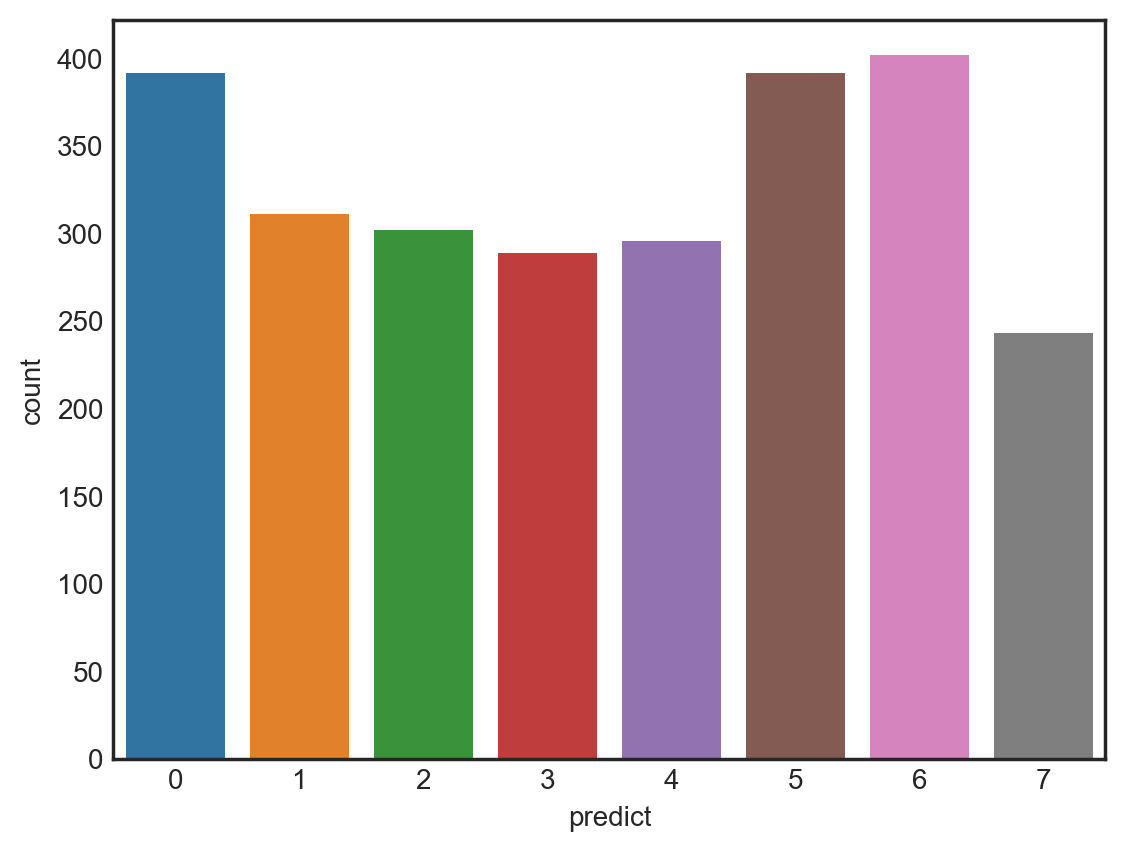

In [235]:
sns.countplot(x=df['predict'])

In [236]:
cluster0 = list(df[df['predict']==0].index)
cluster1 = list(df[df['predict']==1].index)
cluster2 = list(df[df['predict']==2].index)
cluster3 = list(df[df['predict']==3].index)
cluster4 = list(df[df['predict']==4].index)
cluster5 = list(df[df['predict']==5].index)

In [237]:
item_Matrix = pd.DataFrame(columns=['p_id', 'c0', 'c1', 'c2', 'c3', 'c4', 'c5'])

In [238]:
for idx, row in enumerate(data_df['reviews']):
    c0, c1, c2, c3, c4, c5 = 0, 0, 0, 0, 0, 0
    for word in list(row):
        if word in cluster0:
            c0 += 1
        elif word in cluster1:
            c1 += 1
        elif word in cluster2:
            c2 += 1
        elif word in cluster3:
            c3 += 1
        elif word in cluster4:
            c4 += 1
        else:
            c5 += 1
    new_data = pd.DataFrame({'p_id': [data_df['p_id'].iloc[idx]], 'c0': [c0], 'c1': [c1], 'c2': [c2], 'c3': [c3], 'c4': [c4], 'c5': [c5]})
    item_Matrix = pd.concat([item_Matrix, new_data], axis=0, names=['p_id', 'c0', 'c1', 'c2', 'c3', 'c4', 'c5'])